In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime

#Converter para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
base = pd.read_csv('AirPassengers.csv')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
base.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
#Convertendo atributos 

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_format = dateparse)
base

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


In [5]:
ts = base['#Passengers']
ts

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Name: #Passengers, Length: 144, dtype: int64

In [6]:
#Visualizando um registo especifico
ts.iloc[1]

118

In [7]:
#Visualizando por mes e ano
ts['1949-02']

118

In [8]:
#visualizando intervalos de datas
ts['1949-02-1': '1955-02-1']

Month
1949-03    132
1949-04    129
1949-05    121
1949-06    135
1949-07    148
          ... 
1954-10    229
1954-11    203
1954-12    229
1955-01    242
1955-02    233
Name: #Passengers, Length: 72, dtype: int64

In [9]:
#Visualizando do inicio ate a data n
ts[:'1955-02-1']

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1954-10    229
1954-11    203
1954-12    229
1955-01    242
1955-02    233
Name: #Passengers, Length: 74, dtype: int64

In [10]:
ts.index.max()

'1960-12'

In [11]:
ts.index.min()

'1949-01'

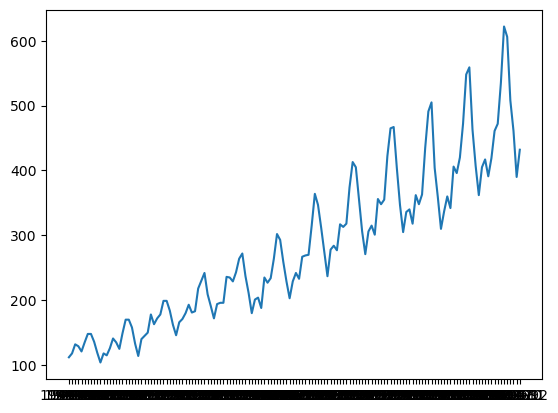

In [12]:
#Visualizacao da serie temporal
plt.plot(ts)

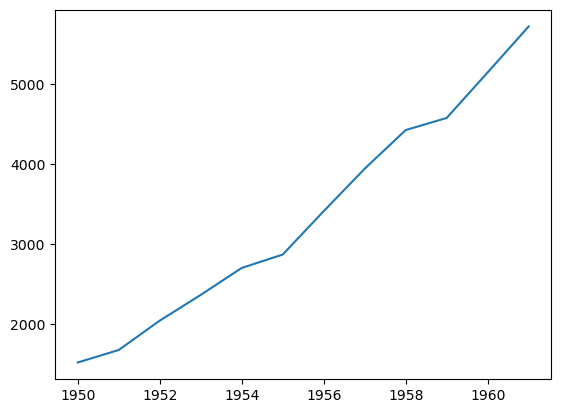

In [16]:
#Visualizando p/ ano
ts.index = pd.to_datetime(ts.index)
ts_ano = ts.resample('YE').sum()
plt.plot(ts_ano)

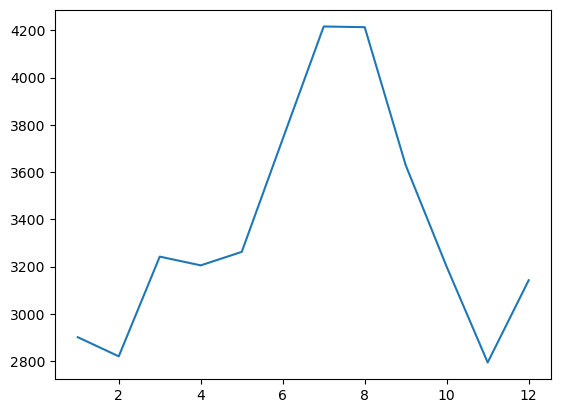

In [18]:
# Visualização p/ mês 
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

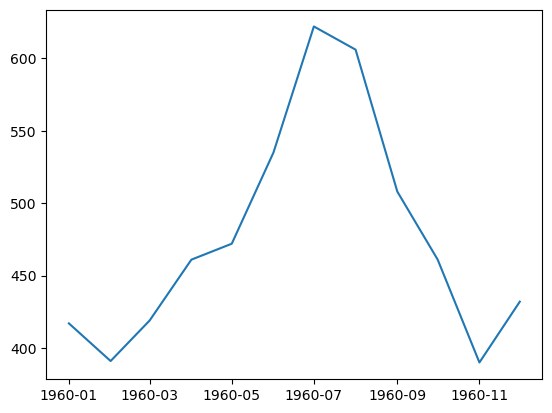

In [20]:
# Visualização entre datas especificas
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas)